# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                diferencia = Y_train[i] - prediction
                error = diferencia ** 2
                train_error_acum += error # Aquí se acumula el error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights = self.weights - learning_rate * weights_derivative
                self.bias = self.bias - learning_rate * bias_derivative

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)

                diferencia = Y_validation[i] - prediction
                error = diferencia ** 2
                val_error_acum += error # Aquí se acumula el error

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()


In [3]:
# Datos de entrenamiento y validación para la puerta AND
# Generar conjuntos de datos
np.random.seed(42)

# Generar datos de entrenamiento
X_train = np.random.randint(2, size=(5000, 2))
Y_train = np.logical_and(X_train[:, 0], X_train[:, 1]).astype(int)

# Generar datos de validación
X_validation = np.random.randint(2, size=(500, 2))
Y_validation = np.logical_and(X_validation[:, 0], X_validation[:, 1]).astype(int)

# Generar datos de prueba
X_test = np.random.randint(2, size=(500, 2))
Y_test = np.logical_and(X_test[:, 0], X_test[:, 1]).astype(int)

print(f'X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}')
print(f'X_validation shape: {X_validation.shape}, Y_validation shape: {Y_validation.shape}')
print(f'X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}')


X_train shape: (5000, 2), Y_train shape: (5000,)
X_validation shape: (500, 2), Y_validation shape: (500,)
X_test shape: (500, 2), Y_test shape: (500,)


epoch: 0 | train error: 0.15899865304805966 | val error: 0.09433543714589979
epoch: 10 | train error: 0.006045498508011107 | val error: 0.005691672966991641
epoch: 20 | train error: 0.001835662574750139 | val error: 0.0017924020510866954
epoch: 30 | train error: 0.0008652093416100895 | val error: 0.0008574774831373145
epoch: 40 | train error: 0.0004996200358177004 | val error: 0.0004991618194071084
epoch: 50 | train error: 0.00032430903412512704 | val error: 0.0003256508262255967
epoch: 60 | train error: 0.00022713937840235004 | val error: 0.00022886817256373854
epoch: 70 | train error: 0.0001678006751282071 | val error: 0.00016950281712798965
epoch: 80 | train error: 0.00012895693392920996 | val error: 0.00013051362659190913
epoch: 90 | train error: 0.00010216443616416442 | val error: 0.00010355256277034268


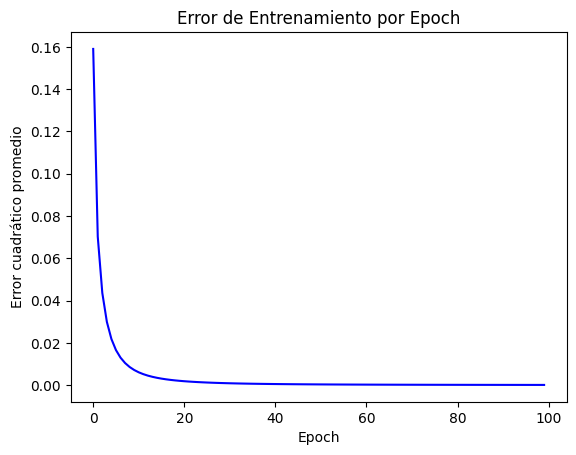

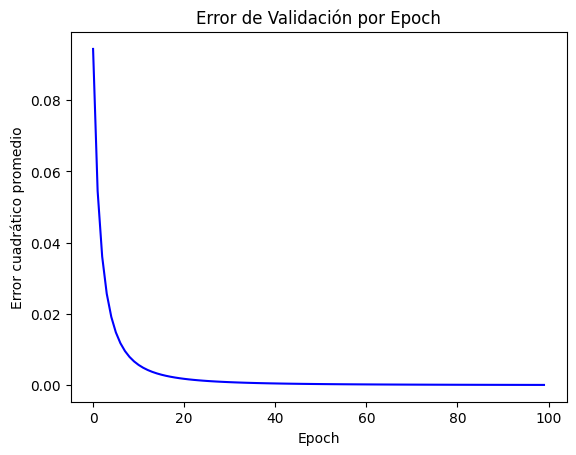

In [5]:
# Crear y entrenar el perceptrón para la puerta AND
N_inputs = X_train.shape[1]
perceptron_and = Perceptron(input_size=N_inputs)

# Entrenar el perceptrón
epochs = 100
learning_rate = 0.01
perceptron_and.train(X_train, Y_train, X_validation, Y_validation, learning_rate, epochs)


In [6]:
# Comprobar predicción del modelo sin entrenar
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 9.601850340973906e-07
Prediction: 0


In [7]:
# Obtenemos un overview de cómo funciona el modelo sin entrenar de forma aleatoria
predictions = []

# Itera por cada muestra de validación y genera las predicciones
for inputs in X_validation:
    prediction = perceptron_and.predict(inputs)
    predictions.append(int(prediction > 0.5))  # Consideramos 0.5 como el umbral para clasificación

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[372   0]
 [  0 128]]


In [9]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 6.932885727476799e-10
Prediction: 0


In [10]:
# Evaluamos cómo funciona el modelo en el set de validación
predictions = []

# Itera por cada muestra de validación guardando las predicciones en una lista
for inputs in X_validation:
    prediction = perceptron_and.predict(inputs)
    predictions.append(int(prediction > 0.5))  # Consideramos 0.5 como el umbral para clasificación

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[372   0]
 [  0 128]]


In [11]:
# Evaluamos cómo funciona el modelo en el set de test

# Generar el set de test (de forma similar al de validación)
X_test = np.random.randint(2, size=(500, 2))
Y_test = np.logical_and(X_test[:, 0], X_test[:, 1]).astype(int)

# Itera por cada muestra de test guardando las predicciones en una lista
predictions_test = []
for inputs in X_test:
    prediction = perceptron_and.predict(inputs)
    predictions_test.append(int(prediction > 0.5))  # Consideramos 0.5 como el umbral para clasificación

# Calcula la matriz de confusión
conf_matrix_test = confusion_matrix(Y_test, predictions_test)

# Visualiza la matriz de confusión
print("Matriz de Confusión (Test):")
print(conf_matrix_test)


Matriz de Confusión (Test):
[[360   0]
 [  0 140]]
